In [1]:
%matplotlib inline
 
from scipy import fftpack
from scipy import signal

import matplotlib.pyplot as plt
import numpy as np

## Analiza widma

In [2]:
def próbkowany_sygnał(t):
    return (2 * np.sin(2 * np.pi * t) + 3 * np.sin(22 * 2 * np.pi * t) + 2 * np.random.randn(*np.shape(t)))

In [3]:
B = 30.0
f_s = 2 * B
delta_f = 0.01
N = int(f_s / delta_f); N

6000

In [4]:
T = N / f_s; T

100.0

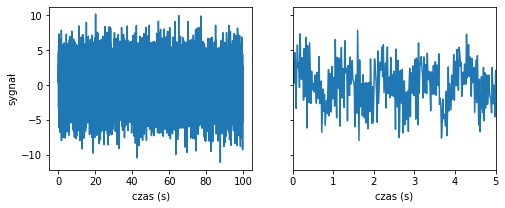

In [5]:
t = np.linspace(0, T, N)
f_t = próbkowany_sygnał(t)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].plot(t, f_t)
axes[0].set_xlabel("czas (s)")
axes[0].set_ylabel("sygnał")
axes[1].plot(t, f_t)
axes[1].set_xlim(0, 5)
axes[1].set_xlabel("czas (s)")

plt.show()

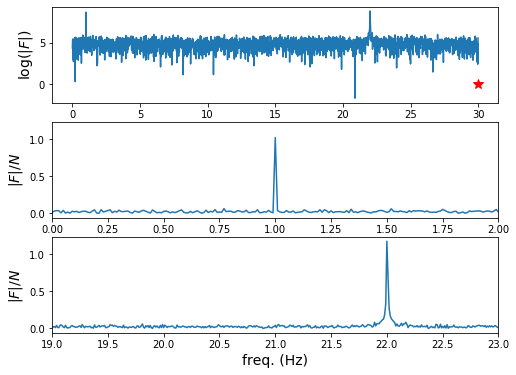

In [6]:
F = fftpack.fft(f_t)
f = fftpack.fftfreq(N, 1.0/f_s)
maska = np.where(f >= 0)

fig, axes = plt.subplots(3, 1, figsize=(8, 6))
axes[0].plot(f[maska], np.log(abs(F[maska])), label="real")
axes[0].plot(B, 0, 'r*', markersize=10)
axes[0].set_ylabel("$\log(|F|)$", fontsize=14)
axes[1].plot(f[maska], abs(F[maska])/N, label="real")
axes[1].set_xlim(0, 2)
axes[1].set_ylabel("$|F|/N$", fontsize=14)
axes[2].plot(f[maska], abs(F[maska])/N, label="real")
axes[2].set_xlim(19, 23)
axes[2].set_xlabel("freq. (Hz)", fontsize=14)
axes[2].set_ylabel("$|F|/N$", fontsize=14)
plt.show()

## Filtry częstotliwościowe

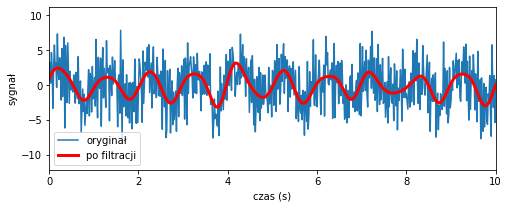

In [7]:
F_filtered = F * (abs(f) < 2)
f_t_filtered = fftpack.ifft(F_filtered)

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, f_t, label='oryginał')
ax.plot(t, f_t_filtered.real, color="red", lw=3, label='po filtracji')
ax.set_xlim(0, 10)
ax.set_xlabel("czas (s)")
ax.set_ylabel("sygnał")
ax.legend()
plt.show()

## Spektrogram

In [8]:
import scipy.io.wavfile
from scipy import io

sample_rate, data = io.wavfile.read("guitar.wav")
print(sample_rate)
print(data.shape)

44100
(132325, 2)


C:\Users\Jarek\anaconda3\lib\site-packages\ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


In [9]:
data = data.mean(axis=1)

In [10]:
data.shape[0] / sample_rate

3.000566893424036

In [11]:
N = int(sample_rate/2.0) # pół sekundy -> 22050 próbek

In [12]:
f = fftpack.fftfreq(N, 1.0/sample_rate)
t = np.linspace(0, 0.5, N)
maska = (f > 0) * (f < 1000)

In [13]:
subdata = data[:N]
F = fftpack.fft(subdata)

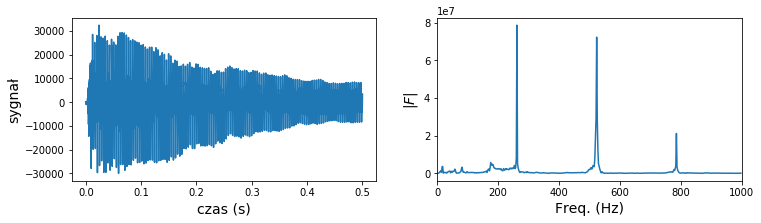

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(t, subdata)
axes[0].set_ylabel("sygnał", fontsize=14)
axes[0].set_xlabel("czas (s)", fontsize=14)
axes[1].plot(f[maska], abs(F[maska]))
axes[1].set_xlim(0, 1000)
axes[1].set_ylabel("$|F|$", fontsize=14)
axes[1].set_xlabel("Freq. (Hz)", fontsize=14)
plt.show()

In [15]:
n_max = int(data.shape[0] / N)
f_values = np.sum(maska)
spectogram_data = np.zeros((n_max, f_values))

window = signal.blackman(len(subdata))

for n in range(0, n_max):
    subdata = data[(N * n):(N * (n + 1))]
    F = fftpack.fft(subdata * window)
    spectogram_data[n, :] = np.log(abs(F[maska]))

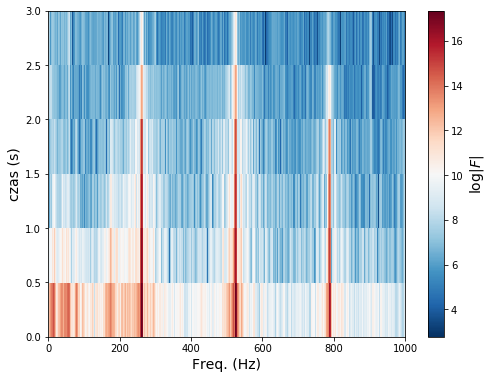

In [16]:
import matplotlib as mpl
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = ax.imshow(spectogram_data, origin='lower', 
              extent=(0, 1000, 0, data.shape[0] / sample_rate), 
              aspect='auto', 
              cmap=mpl.cm.RdBu_r)
cb = fig.colorbar(p, ax=ax)
cb.set_label("$\log|F|$", fontsize=14)
ax.set_ylabel("czas (s)", fontsize=14)
ax.set_xlabel("Freq. (Hz)", fontsize=14)
plt.show()